In [439]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

## The Training, Validation, Test Split

In [440]:
diamond_data = pd.read_csv("diamond_data.csv")
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.00,Ideal,E,I1,61.8,56.0,3520,6.38,6.43,3.96
1,2.18,Ideal,I,SI2,62.5,55.0,15706,8.31,8.34,5.20
2,0.53,Ideal,H,SI1,62.2,54.0,1205,5.18,5.23,3.24
3,0.30,Ideal,G,VS1,61.5,57.0,605,4.31,4.34,2.66
4,0.76,Premium,E,SI1,58.3,62.0,2937,6.12,5.95,3.52


In [441]:
len(diamond_data)

2000

In [442]:
from sklearn.utils import shuffle
diamond_data = shuffle(diamond_data)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
585,2.01,Very Good,H,VS2,60.7,56.0,18561,8.08,8.17,4.93
435,0.57,Ideal,E,VS1,61.3,57.0,2110,5.34,5.37,3.28
403,1.08,Ideal,D,SI2,60.2,57.0,5247,6.63,6.67,4.00
1871,0.90,Very Good,E,SI2,59.5,61.0,3139,6.24,6.30,3.73
1528,0.41,Premium,D,SI2,62.0,58.0,876,4.78,4.74,2.95


In [443]:
#split our 2000 rows into 1500 for training, 300 for validation, 200 for test
diamond_training_data, diamond_validation_data, diamond_test_data = np.split(diamond_data, [1500, 1800])

In [444]:
len(diamond_training_data)

1500

In [445]:
len(diamond_validation_data)

300

In [446]:
len(diamond_test_data)

200

In [447]:
numeric_diamond_training_data = diamond_training_data[["carat", "depth", "table", "x", "y", "z"]]
numeric_diamond_validation_data = diamond_validation_data[["carat", "depth", "table", "x", "y", "z"]]
numeric_diamond_test_data = diamond_test_data[["carat", "depth", "table", "x", "y", "z"]]

In [448]:
def get_training_and_validation_mse(degree):
    diamond_poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression(fit_intercept=False))
    ])
    
    diamond_poly_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])    
    
    training_error = mean_squared_error(diamond_poly_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])
    validation_error = mean_squared_error(diamond_poly_model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])
    return training_error, validation_error

Text(0,0.5,'MSE')

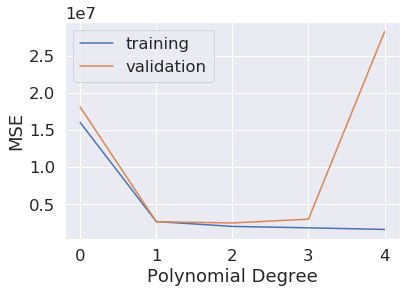

In [449]:
mses = np.array([get_training_and_validation_mse(i) for i in range(5)])
plt.plot(mses[:, 0])
plt.plot(mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')

Since degree 2 minimizes the validation error, let's use that.

In [272]:
diamond_poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression(fit_intercept=False))
])
diamond_poly_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [273]:
diamond_poly_model.named_steps["model"].coef_

array([[ 2.16473463e+06,  2.19376407e+05, -7.10831150e+04,
        -2.74321399e+02, -6.52264062e+04, -6.01000496e+05,
         1.07000681e+06, -1.58188390e+04, -4.57986417e+03,
         4.22137034e+02, -2.28727891e+04,  1.11999754e+04,
         3.87251936e+04,  5.58691825e+02,  3.66043527e+01,
         7.19290810e+02,  1.04008064e+04, -1.72930116e+04,
        -1.07536523e+01,  5.71427940e+02, -2.13419000e+02,
        -8.98110220e+02, -2.57177519e+04,  4.57733046e+04,
         9.14236420e+03,  2.45407240e+04, -1.64745512e+05,
         1.30599812e+05]])

In [274]:
mean_squared_error(diamond_poly_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

2191491.2634235723

In [275]:
mean_squared_error(diamond_poly_model.predict(numeric_diamond_test_data), diamond_test_data[["price"]])

1779792.5200479438

## Regularization

In [276]:
diamond_linear_model = linear_model.LinearRegression()
diamond_linear_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [277]:
diamond_linear_model.coef_

array([[  9130.10468809,    556.05812527,    -56.72412609,
         -2252.21456084,   8911.90954865, -11690.97051116]])

In [278]:
diamond_linear_ridge_model = linear_model.Ridge(alpha=100)
diamond_linear_ridge_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [279]:
diamond_linear_ridge_model.coef_

array([[1589.58886258,  -28.12423307,  -69.19071932,  987.58816667,
        1166.88775792,  646.85710471]])

In [280]:
mean_squared_error(diamond_linear_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

2870214.4480507374

In [281]:
mean_squared_error(diamond_linear_ridge_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

3525294.217872296

In [282]:
ss = StandardScaler()
ss.fit(numeric_diamond_training_data)
scaled_numeric_diamond_training_data = ss.transform(numeric_diamond_training_data)
scaled_diamond_linear_ridge_model = linear_model.Ridge(alpha=100)
scaled_diamond_linear_ridge_model.fit(scaled_numeric_diamond_training_data, diamond_training_data[["price"]])

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [283]:
scaled_diamond_linear_ridge_model.coef_

array([[2027.47354517, -121.19476896, -146.36962903,  488.74118809,
         664.69763823,  515.49932686]])

In [284]:
scaled_diamond_linear_ridge_model_pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('model', linear_model.Ridge(alpha=100))
    ])

scaled_diamond_linear_ridge_model_pipeline.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 Ridge(alpha=100, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [285]:
scaled_diamond_linear_ridge_model_pipeline.named_steps["model"].coef_

array([[2027.47354517, -121.19476896, -146.36962903,  488.74118809,
         664.69763823,  515.49932686]])

In [286]:
mean_squared_error(scaled_diamond_linear_ridge_model_pipeline.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

3206249.5479245973

In [287]:
mean_squared_error(diamond_linear_model.predict(numeric_diamond_training_data), diamond_training_data[["price"]])

2870214.4480507374

Where things get interesting is when we look at how test and validation error vary as a function of alpha. First let's consider a linear regression model that uses features up to polynomial degree 4.

In [288]:
#uses scaling to avoid numerical error
degree_4_linear_regression_model = Pipeline([        
    ('scale', StandardScaler()),        
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.LinearRegression(fit_intercept=False))
])   

degree_4_linear_regression_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])
mean_squared_error(degree_4_linear_regression_model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

2592274.4844293157

In [289]:
degree_4_ridge_regression_model = Pipeline([        
    ('scale', StandardScaler()),    
    ('poly', PolynomialFeatures(degree = 4)),
    ('model', linear_model.Ridge(alpha = 0, fit_intercept=False))
])   

degree_4_ridge_regression_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])
mean_squared_error(degree_4_ridge_regression_model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

2592274.4843305987

In [290]:
def get_diamond_ridge_training_and_validation_mse_error(alpha):
    model = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(degree=4)),
        ('model', linear_model.Ridge(alpha=alpha, fit_intercept=False))
    ])    
    
    model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])
    
    training_mse = mean_squared_error(model.predict(numeric_diamond_training_data), diamond_training_data['price'])
    validation_mse = mean_squared_error(model.predict(numeric_diamond_validation_data), diamond_validation_data['price'])

    return training_mse, validation_mse

Text(0,0.5,'MSE')

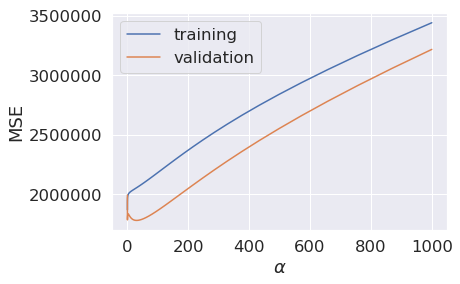

In [291]:
alphas = 10**np.linspace(-3, 3, 100) #between 10^-3 and 10^3
mses = np.array([get_diamond_ridge_training_and_validation_mse_error(alpha) for alpha in alphas])
plt.plot(alphas, mses[:, 0])
plt.plot(alphas, mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')

In [292]:
get_diamond_ridge_training_and_validation_mse_error(10**-1)

(1938349.6626214518, 1785690.1645119858)

Text(0,0.5,'MSE')

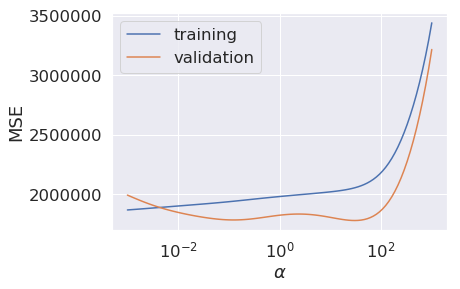

In [293]:
alphas = 10**np.linspace(-3, 3, 100)
mses = np.array([get_diamond_ridge_training_and_validation_mse_error(alpha) for alpha in alphas])
plt.semilogx(alphas, mses[:, 0])
plt.semilogx(alphas, mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')

Text(0,0.5,'MSE')

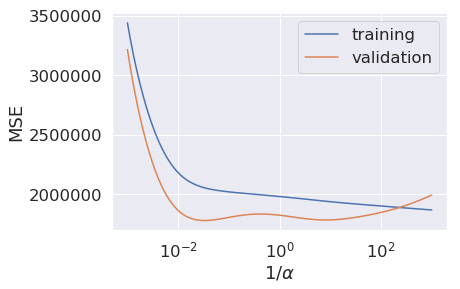

In [294]:
alphas = 10**np.linspace(3, -3, 100)
mses = np.array([get_diamond_ridge_training_and_validation_mse_error(alpha) for alpha in alphas])
plt.semilogx(1/alphas, mses[:, 0])
plt.semilogx(1/alphas, mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$1/\alpha$')
plt.ylabel('MSE')

In [295]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.Ridge(alpha=80, fit_intercept=False))
])    
model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=80, copy_X=True, fit_intercept=False,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [296]:
model.named_steps['model'].coef_

array([[ 2.37608739e+03,  3.66437186e+02, -4.58842168e+00,
        -9.71077883e+00,  7.85560106e+02,  8.70401182e+02,
         8.16268442e+02,  1.71003194e+01,  5.08933261e-02,
         3.24971019e+01,  8.63271367e+01,  1.28525490e+02,
         1.09568395e+02,  5.75902419e+01,  7.67821295e+01,
        -3.56717837e+01, -1.28577234e+01,  1.08311487e+01,
         1.52761112e+02,  8.81158267e+00,  1.92607012e+00,
         2.02539549e+00,  2.31372135e+02,  2.80241018e+02,
         2.49586610e+02,  3.33254371e+02,  3.02365238e+02,
         2.83369371e+02, -1.47171667e+02, -1.79715483e+01,
         3.25910569e+00, -1.01865270e+02, -6.04650959e+01,
        -7.33621523e+01,  3.19812320e+01, -4.58642794e+01,
         9.40310877e+00, -2.73029071e+01,  5.73331215e+00,
         1.05891162e+00, -1.41976309e+01, -5.46879562e+00,
        -1.89390958e+01, -5.96728299e+01, -1.31145757e+01,
        -2.65226273e+01,  3.56034771e+01,  1.49765142e+01,
         5.88333391e+00, -9.72266305e+00,  3.38235182e+0

In [297]:
mean_squared_error(model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

1831730.3112350968

In [298]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', linear_model.Ridge(alpha=80, fit_intercept=False))
])    
model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=80, copy_X=True, fit_intercept=False,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [299]:
model.named_steps['model'].coef_

array([[ 2.52672287e+03,  4.52815343e+02,  5.96125423e+01,
        -3.28600843e+01,  8.98128258e+02,  9.86784211e+02,
         9.37612902e+02,  8.31788492e-02, -3.90719101e+01,
         4.95722553e+00,  7.23269496e+00,  1.54286555e+02,
         8.42478326e+01, -2.75062008e+01,  2.05208991e+01,
        -1.91204288e+01, -1.78114746e+01,  1.24108641e+01,
         7.62055035e+01, -5.67375167e+01, -5.66667438e+01,
        -7.26793087e+01,  9.44040614e+01,  2.40232863e+02,
         1.66023608e+02,  3.91170242e+02,  3.12831914e+02,
         2.50644507e+02,  1.95075723e+02,  2.06561861e+02,
         2.37305117e+02, -3.07332638e+02, -9.33865550e+01,
        -8.70087949e+01, -9.99981480e+01, -1.03630082e+02,
         1.30126704e+01, -2.15051656e+01,  1.46285919e+01,
        -2.38372530e+02,  6.59881237e+01,  6.57028832e+01,
         2.15840875e+01, -3.52574694e+02, -1.67355839e+02,
        -2.11292263e+02,  1.94814812e+01, -3.15164016e+01,
        -6.33618976e+01, -4.90364861e+00,  2.57438239e+0

In [300]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', linear_model.Lasso(alpha=80, fit_intercept=False))
])    
model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Lasso(alpha=80, copy_X=True, fit_intercept=False,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [301]:
model.named_steps['model'].coef_

array([2854.47148939,    0.        ,    0.        ,   -0.        ,
          0.        , 2236.92412925, 1028.38234473,    0.        ,
          0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,  -41.31819205,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
         -0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,  995.53116862,  264.82338065,   79.52408072,
       -163.05833625,   60.44640881,    9.91865103,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  -16.99949205,    0.        ,   -0.        ,
         -0.        ,  -12.49524815,    0.        ,   -0.        ,
         -0.        ,   -0.        ,    0.        ,    0.     

In [302]:
ridge_alpha_80 = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.Ridge(alpha=80, fit_intercept=False))
])    
ridge_alpha_80.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=80, copy_X=True, fit_intercept=False,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

## Cross Validation Demo

With the linear_model.Ridge model, we had to pick a particular alpha.

In [303]:
ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.Ridge(alpha=0.1, fit_intercept=False))
])    
ridge_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=0.1, copy_X=True, fit_intercept=False,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

With the linear_model.RidgeCV model, we give a list of alphas and it will automatically find the best one. 
This is done without use of a pre-determined validation set!

In [304]:
cv_model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], fit_intercept=False))
])    
cv_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         cv=None, fit_intercept=False, gcv_mode=None,
                         normalize=False, scoring=None,
                         store_cv_values=False))],
         verbose=False)

In [305]:
cv_model.named_steps['model'].alpha_

100.0

In [306]:
cv_model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.RidgeCV(alphas=10**np.linspace(3, -3, 100), fit_intercept=False))
])    
cv_model.fit(numeric_diamond_training_data, diamond_training_data[["price"]])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 RidgeCV(alphas=array([1.00000000e+03, 8.69749003e+02, 7.56463328e+02, 6.57933225e+02,
       5.72236766e+02, 4.97702356e+02, 4.32876128e+02, 3.76493581e+02,
       3.27454916e+02, 2....
       8.11130831e-03, 7.05480231e-03, 6.13590727e-03, 5.33669923e-03,
       4.64158883e-03, 4.03701726e-03, 3.51119173e-03, 3.05385551e-03,
       2.65608778e-03, 2.31012970e-03, 2.00923300e-03, 1.74752840e-03,
       1.51991108e-03, 1.32194115e-03, 1.14975700e-03, 1.00000000e-03]),
                         cv=None, fit_intercept=False, gcv_mode=None,
                         normalize=False, scoring=None,
                         store_cv_values=False))],
         verbose=Fals

In [307]:
cv_model.named_steps['model'].alpha_

123.28467394420659

Earlier, from our graph, we saw that an alpha of around 80 minimized the error on a special validation set.

In [308]:
mean_squared_error(ridge_alpha_80.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

1831730.3112350968

Interestingly, even though our cv_model never even got to see the numeric_diamond_validation_data, the alpha it picks is still pretty good on this unseen data.

In [309]:
mean_squared_error(cv_model.predict(numeric_diamond_validation_data), diamond_validation_data[["price"]])

1906176.2029619503